# Introduction to Scikit-Learn (sklearn)
This notebook demonstrate some of the most useful functions of Scikit Learn
What we are going to cover:

0. An end-to-end Scikit Learn Workflow
1. Getting Data Ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

# 0. An end to end Scikit Learn Workflow

In [1]:
#1. Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# 1. Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
Y = heart_disease['target']

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We will keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [5]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [6]:
# Make a prediction
Y_preds = clf.predict(X_test)
Y_preds

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [7]:
# 4. Evaluate the model on training data and test data
clf.score(X_train, Y_train)

1.0

In [8]:
clf.score(X_test, Y_test)

0.8360655737704918

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.86      0.86      0.86        35

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [10]:
confusion_matrix(Y_test,Y_preds)

array([[21,  5],
       [ 5, 30]])

In [11]:
accuracy_score(Y_test,Y_preds)

0.8360655737704918

In [12]:
# 5. Improve a model
# Try different amount of estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators..')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, Y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators..
Model accuracy on test set: 81.97%

Trying model with 20 estimators..
Model accuracy on test set: 80.33%

Trying model with 30 estimators..
Model accuracy on test set: 81.97%

Trying model with 40 estimators..
Model accuracy on test set: 78.69%

Trying model with 50 estimators..
Model accuracy on test set: 78.69%

Trying model with 60 estimators..
Model accuracy on test set: 81.97%

Trying model with 70 estimators..
Model accuracy on test set: 78.69%

Trying model with 80 estimators..
Model accuracy on test set: 80.33%

Trying model with 90 estimators..
Model accuracy on test set: 80.33%



In [13]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl","wb"))

In [14]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test, Y_test)

0.8032786885245902

# 1. Getting Data Ready
Things to remember:

    1. Split the data into features and labels usually 'X' denotes features and 'Y' denotes lables
    2. Filling also called computing and disregarding missing values
    3. Converting non numerical values to numerical values (feature encoding)

In [15]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target", axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [18]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [21]:
car_sales = pd.read_csv('../data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [23]:
# Split it into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [24]:
# Build an ml model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size = 0.2)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test,y_test)

### 1.2 What if there were missing values
1. Fill them with some value (also known as imputation).
1. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

In [ ]:
# Create X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Let's convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [ ]:
# Filling data
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())
car_sales_missing["Door"] = car_sales_missing["Doors"].fillna(4)

In [ ]:
# Removing Rows with missing price column
car_sales_missing = car_sales_missing.dropna()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [ ]:
# Still same because in newer version of sklearn OneHotEncoder automatically drop na data
transformed_X

In [ ]:
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)

In [ ]:
transformed_X

In [ ]:
len(car_sales_missing)

# 2. Filling values to scikit learn

In [ ]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Drop nan values from label
car_sales_missing = car_sales_missing.dropna(subset=["Price"])

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Split into X and y
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer to fill data
imputer = ColumnTransformer([("cat_imputer",cat_imputer,cat_features),("door_imputer", door_imputer, door_features),("num_imputer",num_imputer,num_features)])

# Transform data
filled_x = imputer.fit_transform(X)
filled_x

In [ ]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make","Colour","Doors","Odometer (KM)"])

In [ ]:
car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)

In [ ]:
transformed_X 

In [ ]:
# Now we have got our data as numbers and filled (no missing values)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
len(car_sales_filled)

In [ ]:
len(car_sales)

# Choosing the right estimator for your problem

Some things to note:
* Sklearn refers to machine learning models, alsgorithms as estimators
* Classification Problem - predicting a category (heart disease or not)
* Sometimes you will see `clf` (short for classification) used as a classification estimator
* Regression Problem - Predicting a number (selling price of a car)

Sklearn machine learning map -> https://scikit-learn.org/stable/tutorial/machine_learning_map/

### 2.1 Picking a machine learning model for a regression problem
Let's use california housing dataset

In [ ]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing  = fetch_california_housing()
housing

In [ ]:
housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df.head()

In [ ]:
housing_df["target"] = housing["target"]
housing_df.head()

In [ ]:
housing_df = housing_df.drop("MedHouseVal",axis=1)

In [ ]:
housing_df

In [ ]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split the data
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model
model = Ridge()
model.fit(X_train,y_train)

# Check the score
model.score(X_test,y_test)

What if `Ridge` could not work.

Well, we could always try a different model

We can try ensemble model (This model is combination of smaller models rather than a single model)

In [ ]:
# Import the RandomForestRegressor from ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target",axis=1)
y = housing_df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create a random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

## 2.2 Picking a ml model for a classification model

In [ ]:
# Data
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data

In [ ]:
iris_df = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])
iris_df 

In [ ]:
iris_df["target"] = iris_data["target"]

In [ ]:
iris_df

In [ ]:
X = iris_df.drop('target',axis=1)
y = iris_df['target']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# Import the model
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
heart_data = pd.read_csv("../data/heart-disease.csv")
heart_data

In [ ]:
# Features and labels
X = heart_data.drop("target",axis=1)
y = heart_data['target']

In [ ]:
# Split data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn import svm
model = svm.LinearSVC(dual="auto")
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
# Let's try with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_data.drop("target",axis=1)
y = heart_data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Select model
model = RandomForestClassifier()

# fitting the data
model.fit(X_train, y_train)
model.score(X_test,y_test)

## 3. Fit the model/algorithm on our data and use it to make predictions
### 3.1 Fitting the data

* `X`= feature variables and data
* `y` = Labels

In [ ]:
# Import sklearn 
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Make the data
X = heart_data.drop("target",axis=1)
y = heart_data["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()

# Fit the model to data (training ml model)
model.fit(X_train,y_train)

# Evaluate the Random Forest Classifier
model.score(X_test,y_test)

## 3.2 Make predictions using a machine learning model
2 Ways to make predictions 

1. `predict()`
2. `predict_proba()`

In [ ]:
# Use a trained model to make predictions
model.predict(np.array([1,8,9,1,2,3,4])) # this does not work

In [ ]:
# The shape of X_test is same as X_train
model.predict(X_test)

In [ ]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
# Another way
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

### Make predictions with predict_proba

In [ ]:
# it returns probabilities of a classification label
model.predict_proba(X_test[:5])

In [ ]:
# Let's predict on the same data..
model.predict(X_test[:5])

`predict()` can also be used for regression model

In [ ]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_data

In [ ]:
housing_df = pd.DataFrame(housing_data.data,columns=[housing_data['feature_names']])
housing_df['target'] = housing_data['target']

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create data
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit Learn models/estimators:
 1. Estimators `buit-in score()` method
 2. The `scoring` paramter
 3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score` method

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Create train/test
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train, y_train)

In [ ]:
# The highest value for the score method is 1.0 and lowest is 0.0
model.score(X_train,y_train) * 100

In [ ]:
y_train

In [ ]:
model.score(X_test,y_test)

Let's use the score on our regression dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=80)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)

In [ ]:
# The default score() evaluation metric is r_squared for regression algorithm
model.score(X_test,y_test)

## 4.2 Evaluating using `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Create train/test
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier()

# Fit classifier to training data
model.fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
cross_val_score(model,X,y,cv=5)

In [ ]:
np.random.seed(42)

# Signle training and test split score
model_single_score = model.score(X_test,y_test)

# Take the mean of 5 fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model,X,y,cv=5))

# Compare the two
model_single_score, model_cross_val_score

In [ ]:
# Scoring parameter set to none by default
# Default scoring parameter of classifier is mean accuracy
cross_val_score(model,X,y,cv=5)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
5. Classification report

**Accuracy**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Accuracy
model = RandomForestClassifier()
cross_val_score = cross_val_score(model,X,y,cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Cross-Validated Classifier Accuracy {np.mean(cross_val_score)*100:.2f}%")

**Area under the receiver operating characteristic curve (AUC/ROC)**

ROC curves are a comparison of a model's true positive rate (tpr) versus a model false positive rate (fpr)

* True Positive -> Model predict 1 when truth is 1
* False Positive -> Model predicts 1 when truth is 0
* True negative -> Model predict 0 when truth is 0
* False negative -> model predicts 0 whrn truth is 1

In [ ]:
# Create X_test..
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Fit the classifier
model.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = model.predict_proba(X_test)

y_probs[:10], len(y_probs)

In [ ]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr,tpr,threshholds
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

In [ ]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    # plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
# Perfect AUC score
roc_auc_score(y_test,y_test)

**Confusion Matrix**

A confusion matrix is a quick way to compare the label a model predicts and the actual labels it was 
supposed to predict.
    
In essence, giving you an idea of where the model is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
confusion_matrix(y_test,y_preds)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Label"], colnames=["Predicted Labels"])

In [ ]:
# Make our confusion matrix more visual using seaborn.heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

### Confusion Matrix

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, this gives you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test,y_preds)

In [ ]:
pd.crosstab(y_test,y_preds,rownames=["Actual Label"], colnames=["Predicted Labels"])

### Creating a confusion matrix using sklearn

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model,X=X,y=y)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

### CLassification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

In [ ]:
# Where precision anc recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive

disease_preds = np.zeros(10000) # model predict every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds,output_dict=True))

### 4.2.2 Regression model evaluation metrics
The one's we're going to cover are:
1. R^2 or cofficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
y_test.mean()

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

In [ ]:
r2_score(y_true=y_test, y_pred=y_test_mean)

In [ ]:
r2_score(y_true=y_test, y_pred=y_test)

***Mean Absolute error***

MAE is the average of the absolute differences between predictions and actual label

It gives you an idea of how wrong your models prediction are.

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds  = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
df = pd.DataFrame(data={"actual values":y_test, "predicted_values":y_preds})
df["differences"] = df["predicted_values"]-df["actual values"]
df

In [ ]:
# MAE using formulas and differences
np.abs(df["differences"].mean())

**Mean squared error**

MSE  is the mean of  the square of errors between actual  and predicted values

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
y_preds  = model.predict(X_test)
mse = mean_squared_error(y_true=y_test,y_pred=y_preds)
mse

In [ ]:
df["squared_differences"] = np.square(df["predicted_values"]-df["actual values"])
df

In [ ]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

In [ ]:
df_large = df.copy()
df_large.iloc[0]["squared_differences"] = 16
df_large

In [ ]:
# Calculate MSE with large error
df_large["squared_differences"].mean()

In [ ]:
df_large.iloc[1:100] = 20
df_large

In [ ]:
df_large["squared_differences"].mean()

###  4.2.3 Finally using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier() 

In [ ]:
np.random.seed(42)

# Cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
# if scoring is None, estimators default scoring defaultt is used means accuracy for classification
cv_acc

In [ ]:
# Cross-Validated Accuracy
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:.2f}")

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy") 
cv_acc

In [ ]:
# Cross-Validated Accuracy
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:.2f}")

In [ ]:
# Precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

In [ ]:
# Cross-Validated Precision
print(f"The cross validated precision is {np.mean(cv_precision)*100:.2f}")

In [ ]:
# Recall
cv_recall = cross_val_score(clf,X,y,cv=5, scoring="recall")
cv_recall

In [ ]:
# Cross-Validated Recall
print(f"The cross validated accuracy is {np.mean(cv_recall)*100:.2f}")

### Scoring Parameter for Regression Problem

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

model = RandomForestRegressor()

In [ ]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None)
np.mean(cv_r2)

In [ ]:
# Mean absolute Error
cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mae)

In [ ]:
# Mean sqaured Error
cv_mse = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mse)

In [ ]:
cv_mae

In [ ]:
cv_mse

## 4.3 Using different evaluation metrics as scikit learn functions
The 3rd way to evaluate scikit-learn models

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create Model
clf = RandomForestClassifier()

# fit model
clf.fit(X_train,y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation function
print("Classification metrics on the test set")
print(f"Accuracy Score: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision Score: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall Score: {recall_score(y_test,y_preds)}")
print(f"F1 Score: {f1_score(y_test,y_preds)}")

Classification metrics on the test set
Accuracy Score: 85.25%
Precision Score: 84.85%
Recall Score: 0.875
F1 Score: 0.8615384615384616


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = housing_df.drop("target",axis=1)
y = housing_df["target"]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Create Model
model = RandomForestRegressor()

# fit model
model.fit(X_train,y_train)

# Model predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation function
print("Regression metrics on test set")
print(f"R2 Score ${r2_score(y_test,y_preds)}")
print(f"MAE ${mean_absolute_error(y_test,y_preds)}")

## 5. Improving a model

First Predictions = baseline predictions
First model = baseline model

From a data prespective
* Could we collect more data? (generally the more data the better)
* Could we improve our data

From a model prespectiv:
* Is there a better model we can use
* Could we improve the current model

Parameters vs HyperParameters

Paramters = model find these patterns in data

Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [ ]:
clf.get_params()

### 5.1 Tuning Hyper Parameters by Hand

Let's make 3 sets training, validation and set

# We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [30]:
def evaluate_preds(y_true,y_preds):
    '''
    Preforms evaluation on y_true lables vs y_preds lables
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                  "precisions":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)
                  }
    print(f"Accuracy: {accuracy*100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict

In [52]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data validation into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of Data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled) ) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precisions': 0.81, 'recall': 0.88, 'f1': 0.85}

In [ ]:
clf.get_params()

In [56]:
# Tuning HyperParameters

clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, y_train)
y_preds = clf_2.predict(X_valid)
clf_2_metrics=evaluate_preds(y_valid,y_preds)

Accuracy: 80.00
Precision: 0.81
Recall: 0.84
F1: 0.82


### 5.2 Hyperparameter tuning with RandomizedSearchCV 

In [35]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    "max_depth":[None,5,10,20,30],
    "n_estimators":[10,100,200,500,1000],
    "max_features":["sqrt"],
    "min_samples_split":[2,4,6],
    "min_samples_leaf":[1,2,4]
}
np.random.seed(42)

# Split into X and y
X= heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test size
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instanciate RandomForestClassifirer
clf = RandomForestClassifier(n_jobs=1)

#  Set up Randomized Search CV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2
                           )
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

In [36]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [37]:
# Make predictions with the best hyperparams
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(Y_test,rs_y_preds)

Accuracy: 45.90
Precision: 0.53
Recall: 0.51
F1: 0.52


### 5.3 Hyperparameter tuning with GridSearchCV

In [38]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'n_estimators': [10, 100, 200, 500, 1000],
 'max_features': ['sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [44]:
grid_2 = {
    'max_depth': [None],
 'n_estimators': [100, 200,500],
 'max_features': ['sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]
         }

In [47]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(46)

# Split into X and y
X= heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test size
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instanciate RandomForestClassifirer
clf = RandomForestClassifier(n_jobs=1)

#  Set up GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [50]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 500}

In [51]:
# Make predictions with the best hyperparams
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(Y_test,rs_y_preds)

Accuracy: 45.90
Precision: 0.53
Recall: 0.51
F1: 0.52


Let's compare our different model metrics

In [57]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                              "clf_2":clf_2_metrics,
                              "random search":rs_metrics,
                              "grid_search":gs_metrics})

<Axes: >

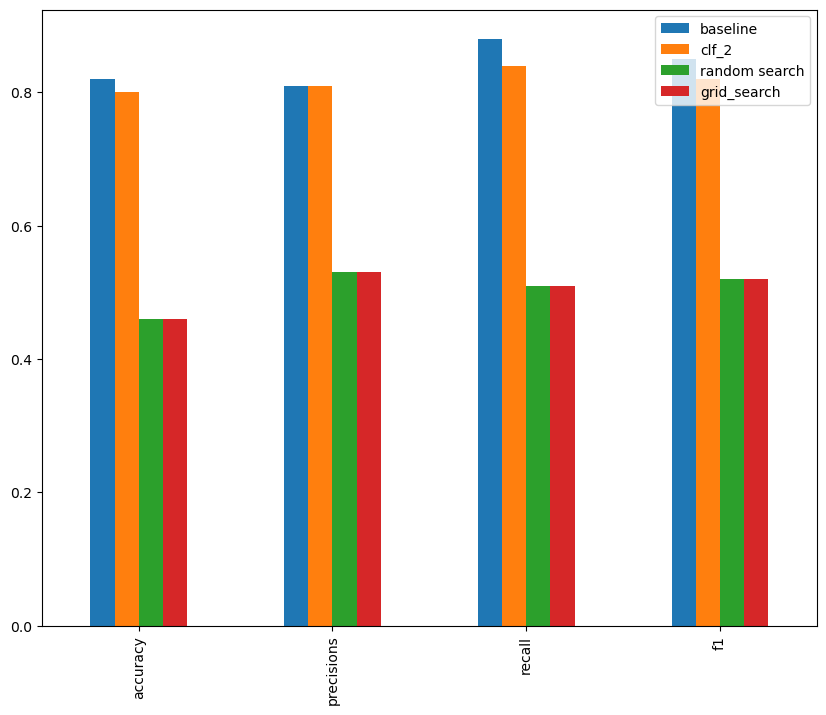

In [58]:
compare_metrics.plot.bar(figsize=(10,8))